
### **Breat Cancer Dataset**

A dataset of 569 female breast cancer subjects, with 32 features.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

We develop an artificial neural network model to predict the type of cancer (maglignant or benign) based on this data.



In [3]:


from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

import pandas as pd
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Read our data from google drive
df_diseasedata = pd.read_csv('Breast Cancer Wisconsin.csv')

In [5]:
# See the dimensions of the dataframe
df_diseasedata.shape

(569, 32)

In [6]:
# Take a look at the data
df_diseasedata.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Because we will not beed the ID column we can drop it
df_diseasedata.drop('id', axis=1, inplace=True)

In [8]:
# check if the id col has been dropped
df_diseasedata.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Values in the diagnosis column
df_diseasedata['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
# replace the M & B in the target variable with 1 & 0
df_diseasedata = df_diseasedata.replace({'diagnosis': {'M': 1, 'B': 0}})

In [11]:
# Check the transformations in the diagnosis variable
df_diseasedata['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [12]:
# Check the data types in the dataframe
df_diseasedata.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [13]:
# Separate our predictors & the target variable
df_predictors = df_diseasedata.drop('diagnosis', axis=1)
df_target = df_diseasedata['diagnosis']

In [14]:
# We split our data into train & test subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_predictors, df_target, test_size=0.2, random_state=1)


In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [16]:
# Scaling of our variables
# Note that all our variables are numeric
from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.fit_transform(X_test)

In [17]:
from sklearn.neural_network import MLPClassifier

# hidden_layer_sizes = number of layers and number of nodes we wish to have in each layer
# max_iter = epochs
# solver is for the optimization algoritm (sgd, adam lbfgs)
# tolerance says if the error improvement is not as per tol, then stop
MLP_model = MLPClassifier(hidden_layer_sizes=(100, 150, 200, 150),
                          max_iter = 100,
                          activation = 'relu',
                          solver = 'adam',
                          learning_rate = 'adaptive', # constant
                          tol=0.00001,
                          verbose=True
                          )

In [18]:
MLP_model.fit(X_train, y_train)

Iteration 1, loss = 0.70280476
Iteration 2, loss = 0.48412209
Iteration 3, loss = 0.31257920
Iteration 4, loss = 0.19072046
Iteration 5, loss = 0.12760112
Iteration 6, loss = 0.09646021
Iteration 7, loss = 0.07486540
Iteration 8, loss = 0.06239431
Iteration 9, loss = 0.05544561
Iteration 10, loss = 0.04850634
Iteration 11, loss = 0.04487371
Iteration 12, loss = 0.04021489
Iteration 13, loss = 0.03575699
Iteration 14, loss = 0.03001779
Iteration 15, loss = 0.02736985
Iteration 16, loss = 0.02293935
Iteration 17, loss = 0.02233539
Iteration 18, loss = 0.02129343
Iteration 19, loss = 0.01726935
Iteration 20, loss = 0.01514328
Iteration 21, loss = 0.01350856
Iteration 22, loss = 0.01162093
Iteration 23, loss = 0.00991598
Iteration 24, loss = 0.00830468
Iteration 25, loss = 0.00656536
Iteration 26, loss = 0.00496328
Iteration 27, loss = 0.00502480
Iteration 28, loss = 0.00451332
Iteration 29, loss = 0.00321372
Iteration 30, loss = 0.00251814
Iteration 31, loss = 0.00241087
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 150, 200, 150), learning_rate='adaptive',
              max_iter=100, tol=1e-05, verbose=True)

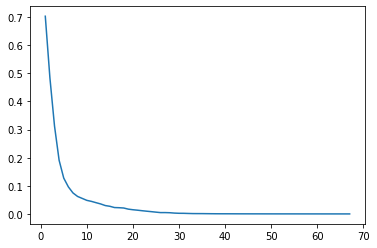

In [23]:
# Plot the output from the MLPClassifier
import matplotlib.pyplot as plt

plt.plot(range(1, 68), MLP_model.loss_curve_)
plt.show()

In [24]:
# Do the predictions
y_pred_train = MLP_model.predict(X_train)
y_pred_test = MLP_model.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix

train_cm = confusion_matrix(y_train, y_pred_train)

test_cm = confusion_matrix(y_test, y_pred_test)

print(train_cm)
print('\n')
print(test_cm)

[[285   0]
 [  0 170]]


[[69  3]
 [ 1 41]]


In [26]:
# In-built function to calcuate the accuracy score
from sklearn.metrics import accuracy_score
train_accuracy_score = accuracy_score(y_pred_train, y_train)
print(train_accuracy_score)

test_accuracy_score = accuracy_score(y_pred_test, y_test)
print(test_accuracy_score)

1.0
0.9649122807017544


In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Accuracy: ", accuracy_score(y_pred_test, y_test))
print("Precision: ", precision_score(y_pred_test, y_test))
print("Recall: ", recall_score(y_pred_test, y_test))
print("F1-Score: ", f1_score(y_pred_test, y_test))

Accuracy:  0.9649122807017544
Precision:  0.9761904761904762
Recall:  0.9318181818181818
F1-Score:  0.9534883720930233


In [28]:
from sklearn.metrics import roc_auc_score

y_pred_train= MLP_model.predict_proba(X_train)[:,1]
y_pred_test= MLP_model.predict_proba(X_test)[:,1]
print('Overall AUC:', roc_auc_score(y_train, y_pred_train))
print('Overall AUC:', roc_auc_score(y_test, y_pred_test))

Overall AUC: 1.0
Overall AUC: 0.996031746031746


ROC AUC: 0.996031746031746


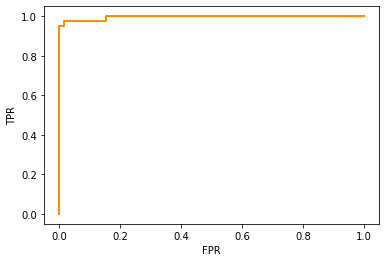

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

#y_pred_test= clf.predict_proba(X_test)[:,1]

fpr, tpr, th = roc_curve(y_test, y_pred_test)

# Plot the ROC Curve
auc_score = "ROC AUC: " + str(auc(fpr, tpr))
print(auc_score)
plt.plot(fpr, tpr, color="darkorange", lw=2)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

**GRID SEARCH WITH NN**

In [30]:
from sklearn.model_selection import GridSearchCV

# solver: adam, sg, lbfgs
parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1100],
              'hidden_layer_sizes':np.arange(10, 15), 
              'random_state':[0,1],
              'activation':['logistic', 'relu'],
              'tol':[.0001, .00001],
              'learning_rate': ['adaptive', 'constant']}

# n_jobs=-1 means use all the threads of your system
NN_grid_model = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, cv=2)

NN_grid_model.fit(X_train, y_train)
print(NN_grid_model.score(X_train, y_train))
print(NN_grid_model.best_params_)

print(NN_grid_model.score(X_test, y_test))


1.0
{'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate': 'adaptive', 'max_iter': 1000, 'random_state': 1, 'solver': 'lbfgs', 'tol': 0.0001}
0.9649122807017544


### **Neural Network using Keras**

In [31]:
from keras.models import Sequential
from keras.layers import Dense

In [32]:
X_train.shape

(455, 30)

In [33]:
seqmodel = Sequential()
seqmodel.add(Dense(50, input_dim=30, activation='relu'))
seqmodel.add(Dense(100, activation='relu'))
seqmodel.add(Dense(150, activation='relu'))
seqmodel.add(Dense(1, activation='sigmoid'))

In [34]:
seqmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Accuracy'])

In [35]:
# The batch size defines the number of samples that will be propagated through the network.
history = seqmodel.fit(df_predictors, df_target, validation_split=0.33, epochs=150, batch_size=100, verbose=False)

In [36]:
print(history.history.keys())

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])


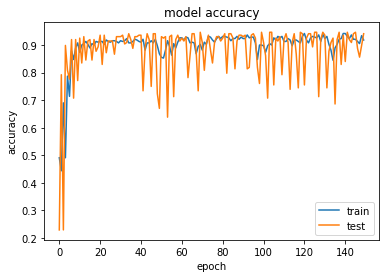

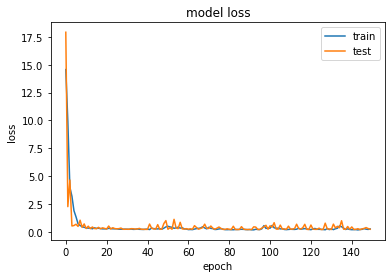

In [41]:
# summarize history for accuracy
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

The final ANN model can predict breast cancer with approximately 90% accuracy and minimal loss function (errors).